# Task 1

In [266]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from random import random, uniform, randrange

In [267]:
def f1(x):
    return x**2

def f2(x):
    return np.exp(x)

def f3(x):
    if all(x > 0):
        return -np.log(x)
    else:
        raise KeyError

def f4(x):
    return np.sin(x)


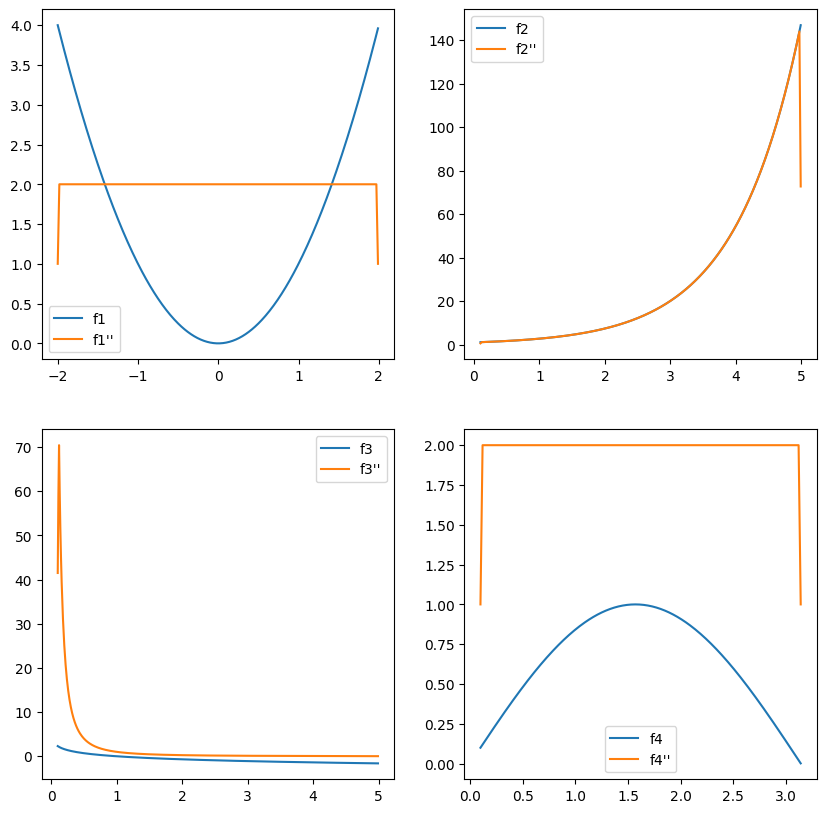

In [268]:
arr1 = np.arange(-2, 2, 0.01)
arr2 = np.arange(0.1, 5, 0.01)
arr3 = np.arange(0.1, 5, 0.01)
arr4 = np.arange(0.1, np.pi, 0.01)

figure, axis = plt.subplots(2, 2, figsize=(10, 10))

axis[0, 0].plot(arr1, f1(arr1), label="f1")
axis[0, 0].plot(arr1, np.gradient(np.gradient(f1(arr1), arr1), arr1), label="f1\'\'")
axis[0, 0].legend()

axis[0, 1].plot(arr2, f2(arr2), label="f2")
axis[0, 1].plot(arr2, np.gradient(np.gradient(f2(arr2), arr2), arr2), label="f2\'\'")
axis[0, 1].legend()

axis[1, 0].plot(arr3, f3(arr3), label="f3")
axis[1, 0].plot(arr3, np.gradient(np.gradient(f3(arr3), arr3), arr3), label="f3\'\'")
axis[1, 0].legend()

axis[1, 1].plot(arr4, f4(arr4), label="f4")
axis[1, 1].plot(arr4, np.gradient(np.gradient(f1(arr4), arr4), arr4), label="f4\'\'")
axis[1, 1].legend()

In [269]:
def is_convex(f, a, b, num_tests=1000):
    for _ in range(num_tests):
        x1 = uniform(a, b)
        x2 = uniform(x1, b)
        l = random()
        lhs = f(l*x1 + (1-l)*x2)
        rhs = l*f(x1) + (1-l)*f(x2)
        if lhs > rhs:
            return False
    
    return True


In [270]:
is_convex(f2, 0.1, 2)

True

# Task 2

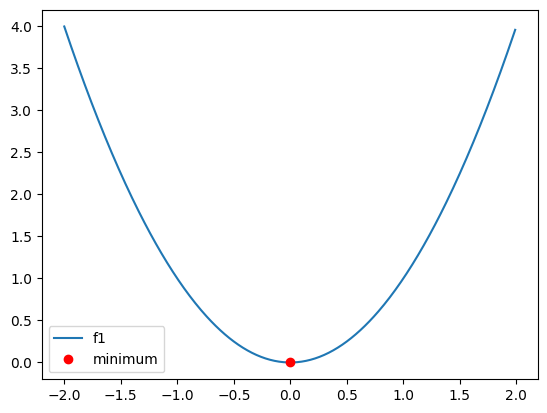

In [271]:
minimum = scipy.optimize.minimize(f1, x0 = [2], bounds=[(-5, 5)])

plt.plot(arr1, f1(arr1), label="f1")
plt.plot(minimum.x, minimum.fun, "ro", label="minimum")

plt.legend()
plt.show()

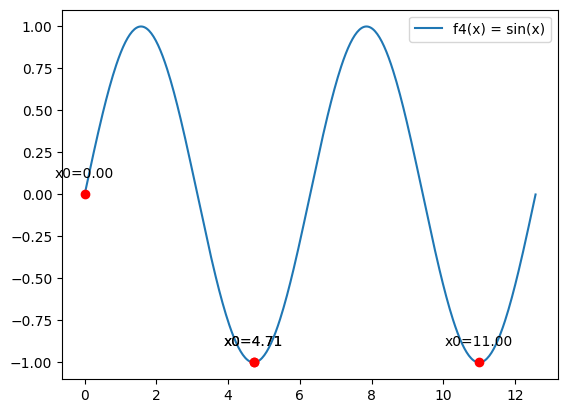

In [272]:
x0_list = [1, 4, 7, 10]
results = []

for x0 in x0_list:
    res = scipy.optimize.minimize(f4, x0=x0, bounds=[(0, 4*np.pi)])
    results.append(res)

x = np.linspace(0, 4*np.pi, 400)
plt.plot(x, f4(x), label="f4(x) = sin(x)")

for res in results:
    plt.plot(res.x, res.fun, "ro")
    plt.text(res.x, res.fun+0.1, f"x0={res.x[0]:.2f}", ha="center")

plt.legend()
plt.show()

# Task 3

### Задача 3: Сравнение скорости сходимости

1. Реализуйте или возьмите готовую реализацию простейшего градиентного спуска для поиска минимума функции
2. Примените его к выпуклой функции f1(x) и невыпуклой функции f4(x)
3. Для каждого запуска записывайте историю приближений к минимуму
4. Постройте графики сходимости (значение функции от номера итерации) для разных начальных точек. Сделайте выводы о том, как выпуклость влияет на сходимость алгоритма оптимизации

In [273]:
def d_f(f, x, h=1e-5):
    return (f(x + h) - f(x - h)) / (2 * h)

def grad_boost(f, a, b, x0, l=0.1, n=10):
    history = np.empty((n + 1, 2), dtype=float)
    history[0] = [x0, f(x0)]

    for i in range(1, n + 1):
        x0 -= l * d_f(f, x0)
        history[i] = [x0, f(x0)]

    if x0 < a:
        return x0
    elif x0 > b:
        return b
    else:
        return x0, history

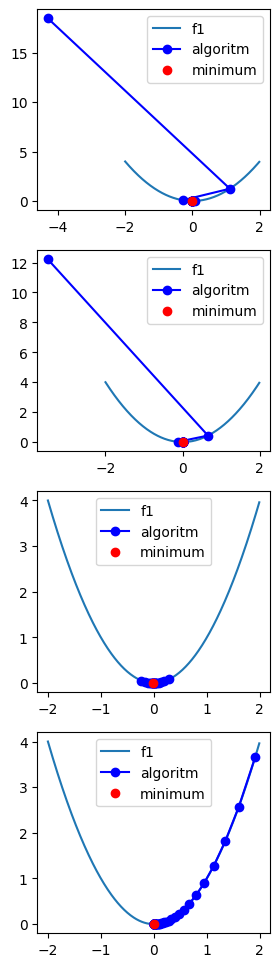

In [274]:
plots_number = 4
figure, axis = plt.subplots(plots_number, figsize=(3, 3*plots_number))

for i in range(plots_number):
    s, f = -5, 5
    x0_f1, history_f1 = grad_boost(f1, s, f, uniform(s, f), random(), randrange(5, 100))
    axis[i].plot(arr1, f1(arr1), label="f1")
    axis[i].plot(history_f1[:, 0], history_f1[:, 1], marker="o", linestyle="-", color="b", label="algoritm")
    axis[i].plot(x0_f1, f1(x0_f1), "ro", label="minimum")
    axis[i].legend()

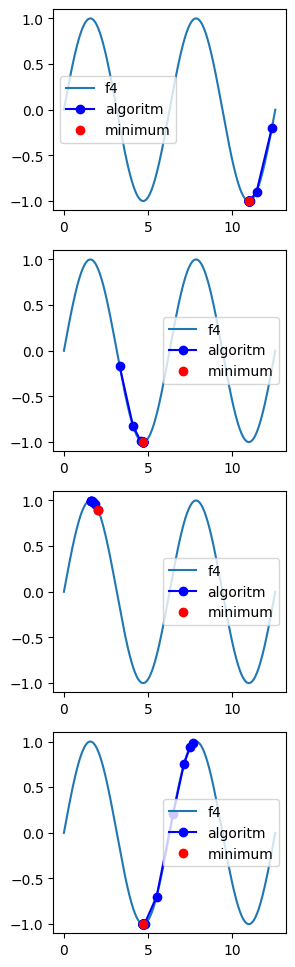

In [275]:
plots_number = 4
figure, axis = plt.subplots(plots_number, figsize=(3, 3*plots_number))

for i in range(plots_number):
    s, f = 0, 4*np.pi
    x0_f4, history_f1 = grad_boost(f4, s, f, uniform(s, f), random(), randrange(5, 100))
    axis[i].plot(np.linspace(0, 4*np.pi, 400), f4(np.linspace(0, 4*np.pi, 400)), label="f4")
    axis[i].plot(history_f1[:, 0], history_f1[:, 1], marker="o", linestyle="-", color="b", label="algoritm")
    axis[i].plot(x0_f4, f4(x0_f4), "ro", label="minimum")
    axis[i].legend()